### Data Wrangling

In [489]:
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt

In [490]:
# Cargar el archivo CSV
df_calls = pd.read_csv("../data/raw/megaline_calls.csv")
df_internet = pd.read_csv("../data/raw/megaline_internet.csv")
df_messages = pd.read_csv("../data/raw/megaline_messages.csv")
df_plans = pd.read_csv("../data/raw/megaline_plans.csv")
df_users = pd.read_csv("../data/raw/megaline_users.csv")

In [491]:
# Pasar Dates a datetime
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"])
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"])

## Valores Nulos

# Calls

In [492]:
# Ver los nulos de Calls
df_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

# Internet

In [493]:
# Ver los nulos de Internet
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

# Messages

In [494]:
# Ver los nulos de Messages
df_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

# Plans

In [495]:
# Ver los nulos de plans
df_plans.isnull().sum()


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

# Users

In [496]:
# Ver los nulos de Users
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [497]:
df_users["churn_date"].unique()

<DatetimeArray>
[                'NaT', '2018-12-18 00:00:00', '2018-11-16 00:00:00',
 '2018-09-07 00:00:00', '2018-12-30 00:00:00', '2018-10-07 00:00:00',
 '2018-12-31 00:00:00', '2018-11-24 00:00:00', '2018-11-11 00:00:00',
 '2018-12-12 00:00:00', '2018-11-14 00:00:00', '2018-12-27 00:00:00',
 '2018-11-29 00:00:00', '2018-12-22 00:00:00', '2018-11-30 00:00:00',
 '2018-10-13 00:00:00', '2018-07-31 00:00:00', '2018-12-15 00:00:00',
 '2018-12-19 00:00:00', '2018-10-03 00:00:00', '2018-10-22 00:00:00',
 '2018-08-16 00:00:00', '2018-12-26 00:00:00', '2018-09-01 00:00:00',
 '2018-11-21 00:00:00', '2018-08-19 00:00:00', '2018-12-10 00:00:00',
 '2018-09-17 00:00:00', '2018-11-18 00:00:00', '2018-09-18 00:00:00']
Length: 30, dtype: datetime64[ns]

In [498]:
# Reeemplazar los nulos de churn_date por 9999-12-31
df_users["churn_date"] = df_users["churn_date"].fillna("9999-12-31")

In [499]:
# Ver los nulos de Users
df_users.isnull().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

## Outliers

# Calls

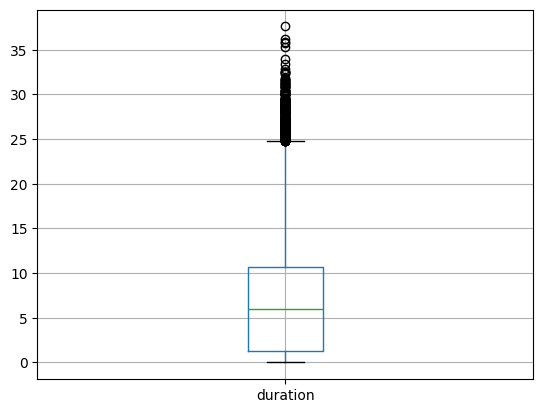

In [500]:
# Boxplot de Calls
df_calls.boxplot(column=['duration'])
plt.show()

In [501]:
Q1 = df_calls['duration'].quantile(0.25)
Q3 = df_calls['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = 0.5
upper_bound = Q3 + 1.25 * IQR

print(lower_bound, upper_bound)

outliers_calls = df_calls[(df_calls['duration'] < lower_bound) | (df_calls['duration'] > upper_bound)]
print(len(outliers_calls))

0.5 22.439999999999998
30887


In [502]:
outliers_calls['user_id'].value_counts()

user_id
1077    282
1324    272
1362    271
1334    261
1240    255
       ... 
1339      2
1323      1
1034      1
1481      1
1306      1
Name: count, Length: 479, dtype: int64

In [503]:
df_calls = df_calls[(df_calls['duration'] >= lower_bound) & (df_calls['duration'] <= upper_bound)]

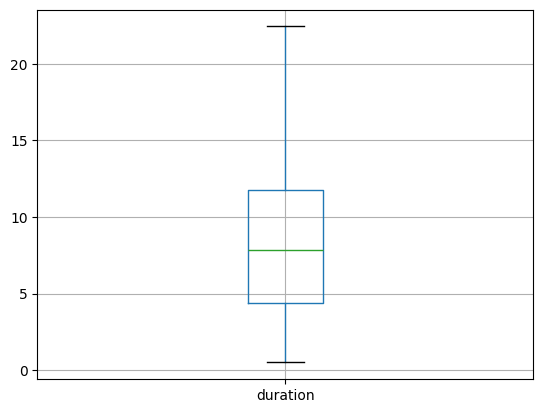

In [504]:
# Boxplot de Calls
df_calls.boxplot(column=['duration'])
plt.show()

# Internet

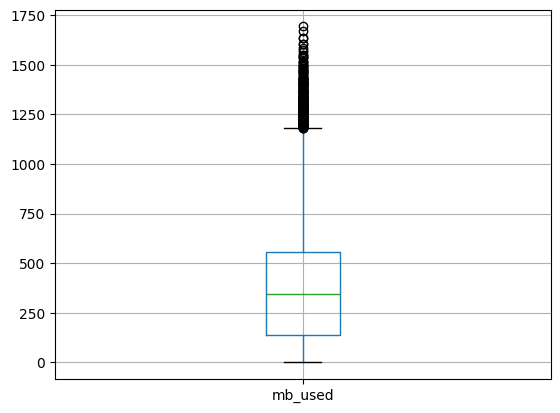

In [505]:
# Boxplot de Internet
df_internet.boxplot(column=['mb_used'])
plt.show()

In [506]:
Q1 = df_internet['mb_used'].quantile(0.25)
Q3 = df_internet['mb_used'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

outliers_internet = df_internet[(df_internet['mb_used'] < lower_bound) | (df_internet['mb_used'] > upper_bound)]
print(len(outliers_internet))

0 1182.405
424


In [507]:
df_internet = df_internet[(df_internet['mb_used'] >= lower_bound) & (df_internet['mb_used'] <= upper_bound)]

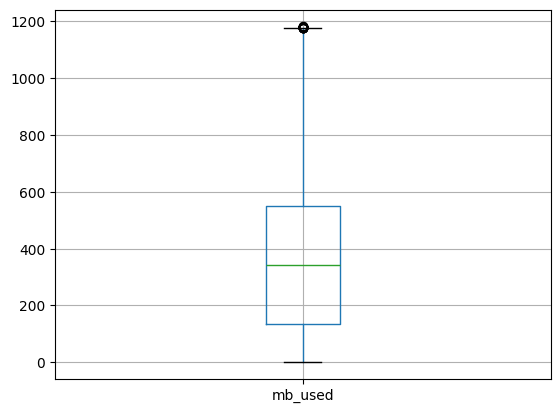

In [508]:
# Boxplot de Internet
df_internet.boxplot(column=['mb_used'])
plt.show()

# Messages

In [509]:
from scipy.stats import zscore

# Contar SMS por usuario
df_sms_count = df_messages.groupby('user_id').size().reset_index(name='sms_count')

# Aplicar Z-score
df_sms_count['z_score'] = zscore(df_sms_count['sms_count'])

# Filtrar outliers (Z-score mayor a 3 o menor a -3)
outliers_sms = df_sms_count[df_sms_count['z_score'].abs() > 3]
print(outliers_sms)

     user_id  sms_count   z_score
59      1077        804  3.202701
107     1132       1288  5.723945
259     1324       1175  5.135308
262     1328       1233  5.437440
379     1470       1056  4.515415


In [510]:
df_messages = df_messages[~df_messages['user_id'].isin(outliers_sms['user_id'])]

## Duplicados

In [511]:
# Ver los duplicados 
print("Calls ", df_calls.duplicated().sum())
print("Internet ", df_internet.duplicated().sum())
print("Messages ", df_messages.duplicated().sum())
print("Plans ", df_plans.duplicated().sum())
print("Users ", df_users.duplicated().sum())

Calls  0
Internet  0
Messages  0
Plans  0
Users  0


In [512]:
# Pasa a csv 
df_calls.to_csv("../data/clean/calls.csv", index=False)
df_internet.to_csv("../data/clean/internet.csv", index=False)
df_messages.to_csv("../data/clean/messages.csv", index=False)
df_plans.to_csv("../data/clean/plans.csv", index=False)
df_users.to_csv("../data/clean/users.csv", index=False)